# SBML models
The Systems Biology Markup Language (SBML) is a computer-readable format for representing models of biological systems. It is an XML-based standard for encoding computational models in systems biology, a field that aims to understand how individual components of biological systems interact to produce the behavior of those systems.

SBML is designed to enable the exchange of such models between different software tools, allowing researchers to use the best tool for each part of a task and facilitating collaborations between different groups. It is also meant to provide a format for storing and archiving models, ensuring that models can be reproduced and reused in the future.

SBML describes models consisting of biochemical entities (such as species), reactions among those entities, and mathematical rules that govern the system. It can represent metabolism, cell signaling, gene regulation, and many other types of biological systems.

The development of SBML is coordinated by the SBML Project, a collaborative, community-driven effort involving researchers, software developers, and others interested in systems biology. The project provides libraries and software tools for working with SBML, as well as resources for learning about the language.

As of my knowledge cutoff in September 2021, the latest stable version of SBML is Level 3 Version 2, but users and developers are advised to check the SBML website for the most current version and associated packages.

To work with sbml we require the additional packages `sbmlutils` and `libroadrunner`. These must be installed in anaconda first.

## Encode SBML model
In a first step we encode our simple model with sbmlutils as SBML.
![Absorption Elimination Model](04_simple_absorption.png)

In [1]:
from sbmlutils.factory import *
from sbmlutils.metadata import *
from pathlib import Path

m = Model(
    sid="absorption_first_order",
    name="Absorption model with first order kinetics",
    
)
m.compartments = [
    Compartment("body", 1.0, name="Body", sboTerm=SBO.SIMPLE_CHEMICAL)
]
m.parameters = [
    Parameter("Dose_A", 10.0, name="Dose of A"),
    Parameter("ka", 1.0, name="Absorption rate"),
    Parameter("ke", 1.0, name="Elimination rate"),
]
m.species = [
    Species("A_tablet", initialAmount=0.0, hasOnlySubstanceUnits=True, 
            compartment="body", name="A (tablet)", sboTerm=SBO.SIMPLE_CHEMICAL),
    Species("A_central", initialAmount=0.0, hasOnlySubstanceUnits=True,
           compartment="body", name="A (body)", sboTerm=SBO.SIMPLE_CHEMICAL),
    Species("A_urine", initialAmount=0.0, hasOnlySubstanceUnits=True,
           compartment="body", name="A (urine)", sboTerm=SBO.SIMPLE_CHEMICAL),
]
m.assignments = [
    InitialAssignment("A_tablet", "Dose_A")
]
m.reactions = [
    Reaction(
        "ABSORPTION",
        name="absorption A",
        equation="A_tablet -> A_central",
        formula = "ka * A_tablet"
    ),
    Reaction(
        "ELIMINATION",
        name="elimination A",
        equation="A_central -> A_urine",
        formula = "ke * A_central"
    )
]

# save the model
results = create_model(
    model=m,
    filepath=Path("absorption_first_order.xml"),
    validation_options=ValidationOptions(units_consistency=False)
)

WARNING  Update registry: 'https://registry.api.identifiers.org/resolutionApi/getResolverDataset'   ]8;id=340934;file:///home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/identifiers/registry.py\registry.py]8;;\:]8;id=162229;file:///home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/identifiers/registry.py#330\330]8;;\
         ->                                                                                                        
         '/home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/resources/identifiers_regist                
         ry.json'                                                                                                  

WARNING  Adding custom namespaces: ['atol', 'brenda.ligand', 'chmo', 'cmo', 'dron', 'fix',          ]8;id=633636;file:///home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/identifiers/registry.py\registry.py]8;;\:]8;id=647649;file:///home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/identifiers/registry.py#343\343]8;;\
         'metabolights.compound', 'mmo', 'mondo', 'nbo', 'oba', 'omim', 'opmi', 'scdo', 'snomed',                  
         'stato', 'vto']                                                                                           

INFO     Write cache:                                                                                   ]8;id=56589;file:///home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/cache.py\cache.py]8;;\:]8;id=265503;file:///home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/cache.py#46\46]8;;\
         /home/mkoenig/.local/lib/python3.10/site-packages/pymetadata/resources/identifiers_registry.js            
         on                                                                                                        

─────────────────────────────────────────────────── Create SBML ───────────────────────────────────────────────────

INFO     Create SBML for model 'absorption_first_order'                                             ]8;id=282149;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=109458;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#3526\3526]8;;\

WARNING  'sboTerm' should be set on 'Parameter(Dose_A, Dose of A)'                                   ]8;id=246728;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=623570;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#466\466]8;;\

WARNING  'sboTerm' should be set on 'Parameter(ka, Absorption rate)'                                 ]8;id=20700;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=979337;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#466\466]8;;\

WARNING  'sboTerm' should be set on 'Parameter(ke, Elimination rate)'                                ]8;id=635282;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=147030;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#466\466]8;;\

WARNING  'sboTerm' should be set on 'Reaction(ABSORPTION, absorption A)'                             ]8;id=291982;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=885800;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#466\466]8;;\

WARNING  'sboTerm' should be set on 'Reaction(ELIMINATION, elimination A)'                           ]8;id=667866;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=252423;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#466\466]8;;\

WARNING  'name' should be set on 'InitialAssignment()'                                               ]8;id=711484;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=11447;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#441\441]8;;\

WARNING  'sboTerm' should be set on 'InitialAssignment()'                                            ]8;id=97078;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py\factory.py]8;;\:]8;id=756221;file:///home/mkoenig/.local/lib/python3.10/site-packages/sbmlutils/factory.py#466\466]8;;\

────────────────────────────────────────────────── Validate SBML ──────────────────────────────────────────────────

absorption_first_order.xml
valid                    : TRUE
check time (s)           : 0.002

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

**Exercise**: Explore the model with `https://sbml4humans.de`. Upload the model to the website and navigate the objects.

**Exercise**: Visualize the model with cytoscape and `cy3sbml`. I.e. Download Cytoscape, install the app `cy3sbml` and load the model to explore the model.

## Simulate SBML model
In a second step we load the model and perform a simple simulation and visualization.

In [2]:
import roadrunner
import pandas as pd
r = roadrunner.RoadRunner("absorption_first_order.xml")
s = r.simulate(start=0, end=10, steps=100)
df = pd.DataFrame(s, columns=s.colnames)
print(df)

     time  [A_tablet]  [A_central]  [A_urine]
0     0.0   10.000000     0.000000   0.000000
1     0.1    9.048374     0.904837   0.046788
2     0.2    8.187307     1.637462   0.175231
3     0.3    7.408182     2.222455   0.369363
4     0.4    6.703201     2.681278   0.615521
..    ...         ...          ...        ...
96    9.6    0.000677     0.006502   9.992821
97    9.7    0.000613     0.005945   9.993443
98    9.8    0.000555     0.005434   9.994011
99    9.9    0.000502     0.004967   9.994531
100  10.0    0.000454     0.004540   9.995006

[101 rows x 4 columns]


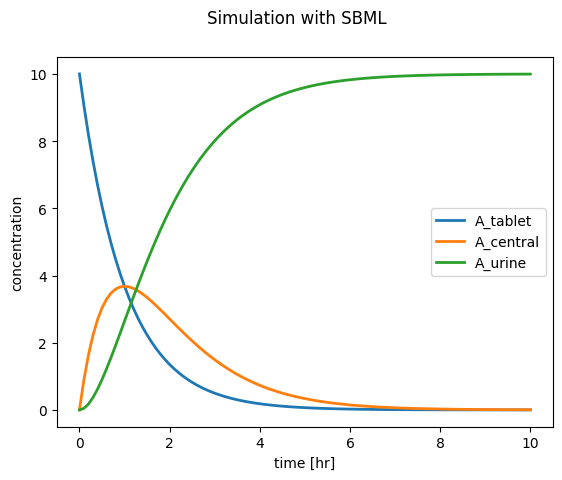

In [3]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(nrows=1, ncols=1)
f.suptitle("Simulation with SBML")

for name in ["A_tablet", "A_central", "A_urine"]:
    ax.plot(df.time, df[f"[{name}]"], lw=2, label=name)
    
ax.set_ylabel("concentration")
ax.set_xlabel("time [hr]")
ax.legend()
plt.show()